In [93]:
import torch

In [105]:
resolution = 64
uv = torch.stack(torch.meshgrid(torch.arange(resolution, dtype=torch.float32, ), 
                                        torch.arange(resolution, dtype=torch.float32,), 
                                        indexing='ij')) * (1./resolution) + (0.5/resolution)

In [103]:
uv[0].shape

torch.Size([64, 64])

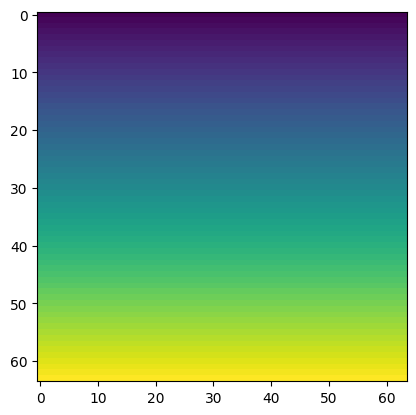

In [104]:
plt.imshow(uv[0])

In [100]:
import numpy as np
import matplotlib.pyplot as plt

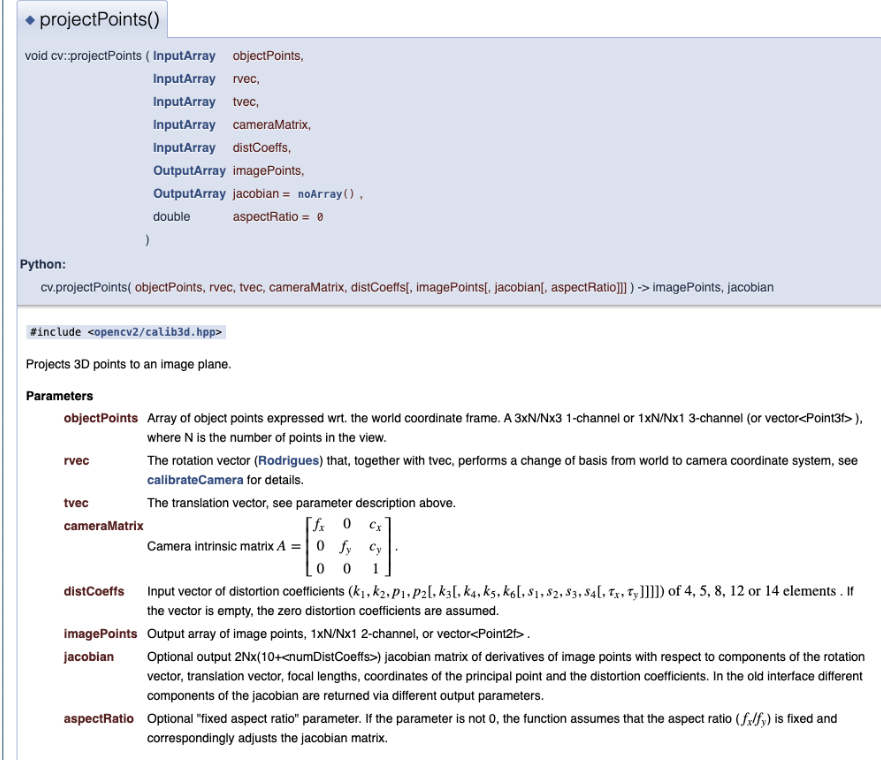

In [ ]:
rot_matrix = cv2.Rodrigues(np.array(rot_vector))
w2c_matrix = torch.eye(4)
w2c_matrix[:3, :3] = rot_matrix.squeeze(0)
w2c_matrix[:3, 3] = trans_vector.squeeze(0)

c2w = torch.from_numpy(np.linalg.inv(w2c_matrix))

(1, 4096, 3)


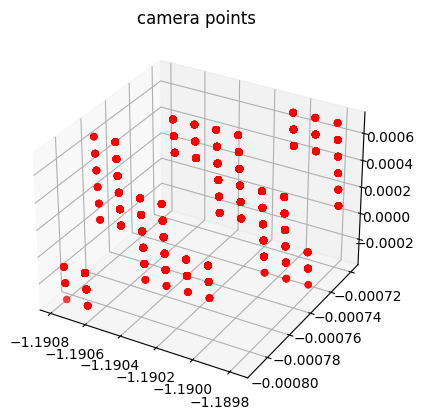

In [84]:
ray_dir = np.load("./ray_dirs.npy",allow_pickle=True)
print(ray_dir.shape)
z = ray_dir[:,:,0]	 # z坐标范围-50~50
x = ray_dir[:,:,1]
y = ray_dir[:,:,2]
ddd_points = np.zeros((1,4096,3))
ddd_points[:,:,0] = z
ddd_points[:,:,1] = x
ddd_points[:,:,2] = y
ax = plt.subplot(projection = '3d')  # 创建一个三维的绘图工程
ax.set_title('camera points')  # 设置本图名称
ax.scatter(x, y, z, c = 'r') 

(1, 4096, 4)


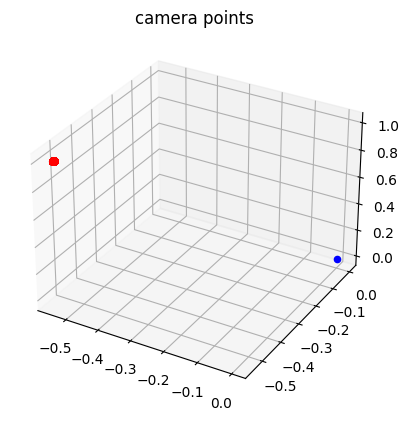

In [106]:
# 在代码中求逆之后得到的camera points
points = np.load("./c2w_camera_points.npy",allow_pickle=True)
print(points.shape)
x = points[:,:,0]	 # z坐标范围-50~50
y = points[:,:,1]
z = points[:,:,2]
ddd_points = np.zeros((1,4096,3))
ddd_points[:,:,0] = x
ddd_points[:,:,1] = y
ddd_points[:,:,2] = z
ax = plt.subplot(projection = '3d')  # 创建一个三维的绘图工程
ax.set_title('camera points')  # 设置本图名称
ax.scatter(x, y, z, c = 'r') 
#ax.scatter(cam_locs_world[0,0],cam_locs_world[0,1],cam_locs_world[0,2], c='b')
#ax.scatter(0,0,0,c="b")

(1, 4096, 3)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

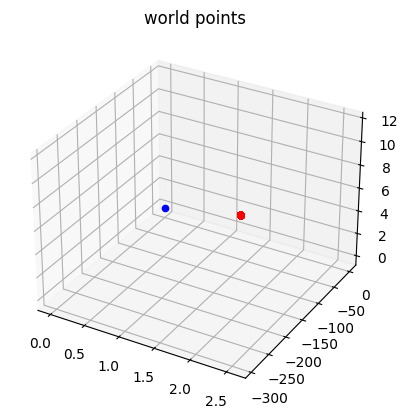

In [86]:
# 在代码中对w2c求逆得到的world points plane
points = np.load("./c2w_world_points.npy",allow_pickle=True)
print(points.shape)
z = points[0,:,0]	 # z坐标范围-50~50
x = points[0,:,1]
y = points[0,:,2]
ddd_points = np.zeros((4096,3))
ddd_points[:,0] = z
ddd_points[:,1] = x
ddd_points[:,2] = y
ax = plt.subplot(projection = '3d')  # 创建一个三维的绘图工程
ax.set_title('world points')  # 设置本图名称
ax.scatter(x, y, z, c = 'r') 
ax.scatter(0,0,0, c='b')
ax.scatter(cam_locs_world[0,0],cam_locs_world[0,1],cam_locs_world[0,2], c='b')

相机坐标系下的中心

In [18]:
cam_locs_world = np.load("./cam_locs_world.npy",allow_pickle=True)
cam_locs_world# 世界坐标系下的相机中心，同时作为坐标原点`

array([[  5.2272873,  16.05991  , 288.64142  ]], dtype=float32)

#### 生成的cam_rel_points

(1, 4096, 3)


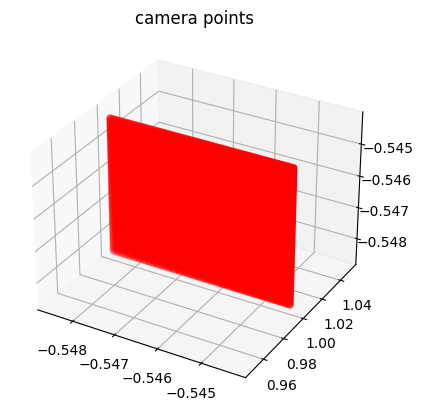

In [42]:
points = np.load("./camera_points.npy",allow_pickle=True)
print(points[:,:,:3].shape)
z = points[:,:,0]	 # z坐标范围-50~50
x = points[:,:,1]
y = points[:,:,2]
ddd_points = np.zeros((1,4096,3))
ddd_points[:,:,0] = z
ddd_points[:,:,1] = x
ddd_points[:,:,2] = y
ax = plt.subplot(projection = '3d')  # 创建一个三维的绘图工程
ax.set_title('camera points')  # 设置本图名称
ax.scatter(x, y, z, c = 'r') 

### 将代码中的w2c矩阵求逆然后转换相机坐标系下的坐标

In [67]:
matrix =np.array([[0.9991163015365601,-0.03375060483813286,-0.025050075724720955,-0.026197634637355804],
        [ 0.03416740521788597,0.9992814660072327,0.016401292756199837, 0.013751846738159657],
        [0.024478524923324585,-0.01724269427359104,0.9995516538619995,0.7718223333358765],
        [0.0, 0.0,0.0,1.0]],dtype=np.float32)
cam_locs_world = matrix[:3, 3]

In [69]:
cam_locs_world

array([-0.02619763,  0.01375185,  0.77182233], dtype=float32)

In [54]:
w2c = np.load("./w2c.npy",allow_pickle=True)
print(w2c)
print(w2c[:,:3,3])

[[[ 9.99855995e-01 -6.62486535e-03  1.56220719e-02  5.22728729e+00]
  [ 4.73327329e-03  9.92984116e-01  1.18152976e-01  1.60599098e+01]
  [-1.62952170e-02 -1.18062019e-01  9.92872536e-01  2.88641418e+02]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]]
[[  5.2272873  16.05991   288.64142  ]]


tensor([[[ 0.9991, -0.0338, -0.0251, -0.0262],
         [ 0.0342,  0.9993,  0.0164,  0.0138],
         [ 0.0245, -0.0172,  0.9996,  0.7718],
         [ 0.0000,  0.0000,  0.0000,  1.0000]]])


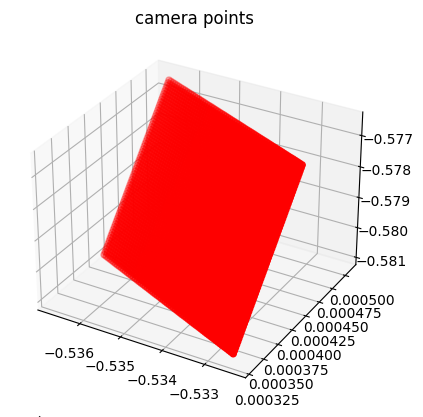

In [73]:
w2c = np.load("./w2c.npy",allow_pickle=True)
c2w = np.linalg.inv(w2c)
cam_rel_points = np.load("./camera_points.npy",allow_pickle=True)
cam_rel_points = torch.from_numpy(cam_rel_points)
c2w = torch.from_numpy(matrix).unsqueeze(0)
print(c2w)
points = torch.bmm(c2w, cam_rel_points.permute(0, 2, 1)).permute(0, 2, 1)[:, :, :3]
z = points[:,:,0]	 # z坐标范围-50~50
x = points[:,:,1]
y = points[:,:,2]
ddd_points = np.zeros((1,4096,3))
ddd_points[:,:,0] = z
ddd_points[:,:,1] = x
ddd_points[:,:,2] = y
ax = plt.subplot(projection = '3d')  # 创建一个三维的绘图工程
ax.set_title('camera points')  # 设置本图名称
ax.scatter(x, y, z, c = 'r')
#ax.scatter(cam_locs_world[0],cam_locs_world[1],cam_locs_world[2], c='b')

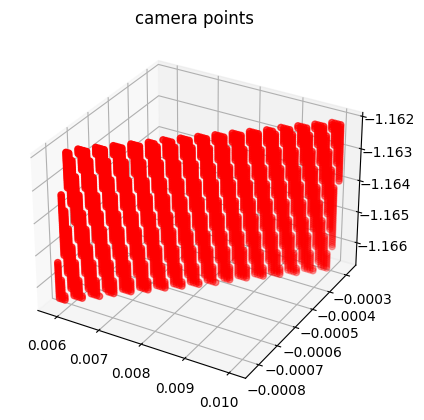

In [41]:
w2c = np.load("./w2c.npy",allow_pickle=True)
c2w = np.linalg.inv(w2c)
cam_rel_points = np.load("./camera_points.npy",allow_pickle=True)
cam_rel_points = torch.from_numpy(cam_rel_points)
c2w = torch.from_numpy(c2w)
points = torch.bmm(c2w, cam_rel_points.permute(0, 2, 1)).permute(0, 2, 1)[:, :, :3]
z = points[:,:,0]	 # z坐标范围-50~50
x = points[:,:,1]
y = points[:,:,2]
ddd_points = np.zeros((1,4096,3))
ddd_points[:,:,0] = z
ddd_points[:,:,1] = x
ddd_points[:,:,2] = y
ax = plt.subplot(projection = '3d')  # 创建一个三维的绘图工程
ax.set_title('camera points')  # 设置本图名称
ax.scatter(x, y, z, c = 'r') 
#ax.scatter(w2c_cam_locs_world[0,0],w2c_cam_locs_world[0,1],w2c_cam_locs_world[0,2], c='b')

目前代码中得到的点

(1, 4096, 3)


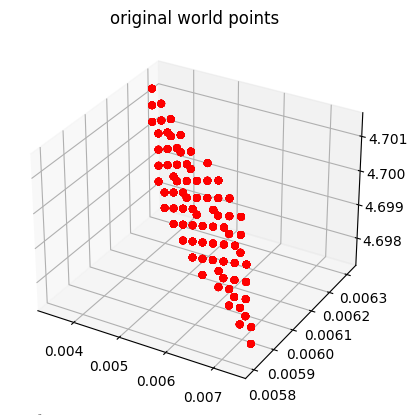

In [46]:
points = np.load("./world_points.npy",allow_pickle=True)
print(points.shape)
z = points[:,:,0]	 # z坐标范围-50~50
x = points[:,:,1]
y = points[:,:,2]
ddd_points = np.zeros((1,4096,3))
ddd_points[:,:,0] = z
ddd_points[:,:,1] = x
ddd_points[:,:,2] = y
ax = plt.subplot(projection = '3d')  # 创建一个三维的绘图工程
ax.set_title('original world points')  # 设置本图名称
ax.scatter(x, y, z, c = 'r') 
#ax.scatter(cam_locs_world[0,0],cam_locs_world[0,1],cam_locs_world[0,2], c='b')

In [ ]:
points = np.load("./world_points.npy",allow_pickle=True)
print(points.shape)
z = points[:,:,0]	 # z坐标范围-50~50
x = points[:,:,1]
y = points[:,:,2]
ddd_points = np.zeros((1,4096,3))
ddd_points[:,:,0] = z
ddd_points[:,:,1] = x
ddd_points[:,:,2] = y
ax = plt.subplot(projection = '3d')  # 创建一个三维的绘图工程
ax.set_title('camera points')  # 设置本图名称
ax.scatter(x, y, z, c = 'r') 
#ax.scatter(cam_locs_world[0,0],cam_locs_world[0,1],cam_locs_world[0,2], c='b')

In [63]:
a = np.load("./pose.npy",allow_pickle=True)

In [65]:
a.sum()

670650.0

In [81]:
def generate_planes():
    """
    Defines planes by the three vectors that form the "axes" of the
    plane. Should work with arbitrary number of planes and planes of
    arbitrary orientation.
    """
    return torch.tensor([[[1, 0, 0],
                            [0, 1, 0],
                            [0, 0, 1]],
                            [[1, 0, 0],
                            [0, 0, 1],
                            [0, 1, 0]],
                            [[0, 0, 1],
                            [1, 0, 0],
                            [0, 1, 0]]], dtype=torch.float32)
def generate_plane():
    """
    Defines planes by the three vectors that form the "axes" of the
    plane. Should work with arbitrary number of planes and planes of
    arbitrary orientation.
    """
    return torch.tensor([[[1, 0, 0],
                            [0, 1, 0],
                            [0, 0, 1]]], dtype=torch.float32)
def project_onto_planes(planes, coordinates):
    """
    Does a projection of a 3D point onto a batch of 2D planes,
    returning 2D plane coordinates.

    Takes plane axes of shape n_planes, 3, 3
    # Takes coordinates of shape N, M, 3
    # returns projections of shape N*n_planes, M, 2
    """
    N, M, C = coordinates.shape
    n_planes, _, _ = planes.shape
    coordinates = coordinates.unsqueeze(1).expand(-1, n_planes, -1, -1).reshape(N*n_planes, M, 3).to(torch.float32)
    inv_planes = torch.linalg.inv(planes).unsqueeze(0).expand(N, -1, -1, -1).reshape(N*n_planes, 3, 3)
    
    projections = torch.bmm(coordinates, inv_planes)
    return projections[..., :2]
def project_onto_planes(planes, coordinates):
    """
    Does a projection of a 3D point onto a batch of 2D planes,
    returning 2D plane coordinates.

    Takes plane axes of shape n_planes, 3, 3
    # Takes coordinates of shape N, M, 3
    # returns projections of shape N*n_planes, M, 2
    """
    N, M, C = coordinates.shape
    n_planes, _, _ = planes.shape
    
    coordinates = coordinates.unsqueeze(1).expand(-1, n_planes, -1, -1).reshape(N*n_planes, M, 3).to(torch.float32)
    inv_planes = torch.linalg.inv(planes).unsqueeze(0).expand(N, -1, -1, -1).reshape(N*n_planes, 3, 3)
    
    projections = torch.bmm(coordinates, inv_planes)
    return projections[..., :2]

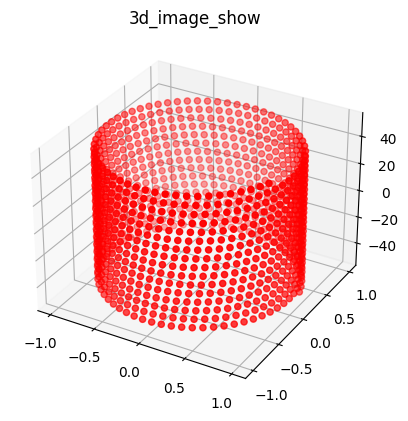

In [90]:
#ax = plt.axes(projection='3d')  # 设置三维图形模式
z = np.arange(-50, 50, 0.1)	 # z坐标范围-50~50
x = np.cos(z)
y = np.sin(z)
ddd_points = np.zeros((1,1000,3))
ddd_points[:,:,0] = z
ddd_points[:,:,1] = x
ddd_points[:,:,2] = y
ax = plt.subplot(projection = '3d')  # 创建一个三维的绘图工程
ax.set_title('3d_image_show')  # 设置本图名称
ax.scatter(x, y, z, c = 'r')   # 绘制数据点 c: 'r'红色，'y'黄色，等颜色

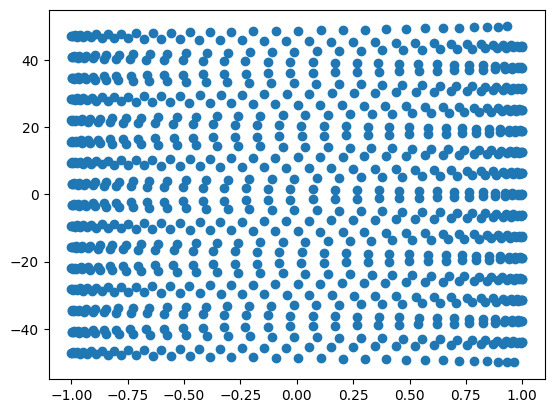

In [94]:
plane_axe = generate_plane()
points = project_onto_planes(plane_axes, torch.from_numpy(ddd_points))
plt.scatter(points[:,:,1],points[:,:,0])

In [84]:
plane_axes = generate_plane()
coord = torch.randn(1,50,3)
points = project_onto_planes(plane_axes, coord)

In [80]:
plane_axes.shape

torch.Size([3, 3, 3])

In [78]:
points.shape

torch.Size([3, 50, 2])

Text(0.5, 0, 'Z')

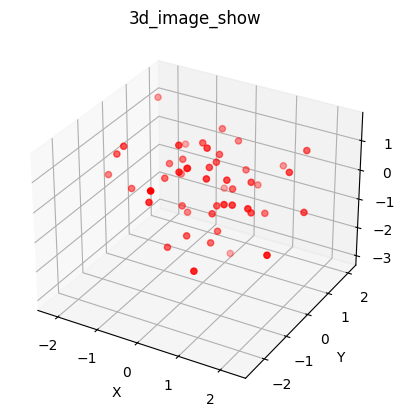

In [85]:

x = np.array(coord[:,:,0])
y = np.array(coord[:,:,1])
z = np.array(coord[:,:,2])
 
ax = plt.subplot(projection = '3d')  # 创建一个三维的绘图工程
ax.set_title('3d_image_show')  # 设置本图名称
ax.scatter(x, y, z, c = 'r')   # 绘制数据点 c: 'r'红色，'y'黄色，等颜色
 
ax.set_xlabel('X')  # 设置x坐标轴
ax.set_ylabel('Y')  # 设置y坐标轴
ax.set_zlabel('Z')  # 设置z坐标轴
 


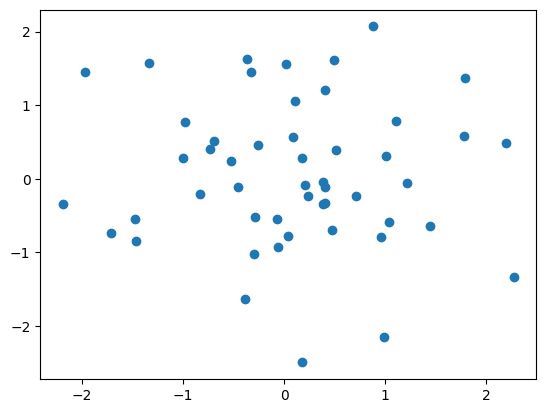

In [86]:
plt.scatter(points[:,:,0], points[:,:,1])

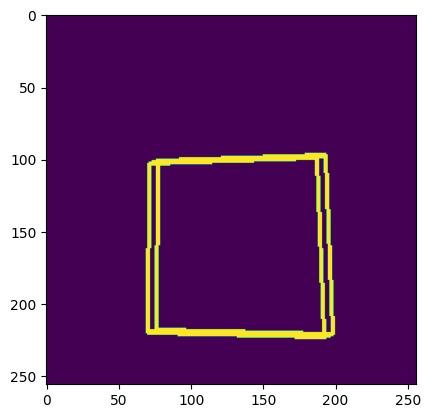

In [66]:
plt.imshow(a)

In [48]:
deformed = np.load("./deformed.npy")
deformation = np.load("./deformation.npy")
mask = np.load("./mask.npy")
occ_map = np.load("./occlusion_map.npy")
sparse_map = np.load("./sparse_deformed.npy")
#jacbi = np.load("./jacobian.npy")
prediction = np.load("./prediction.npy")

(1, 3, 256, 256)


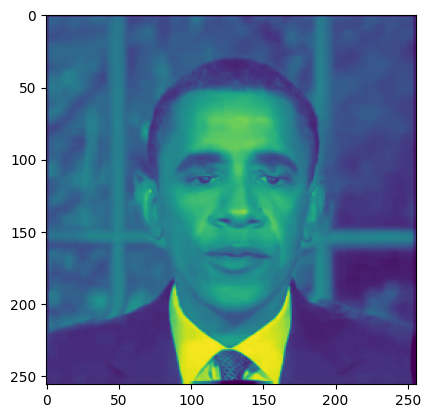

In [54]:
print(deformed.shape)
plt.imshow(deformed[0,0])

上图经过

(1, 3, 256, 256)


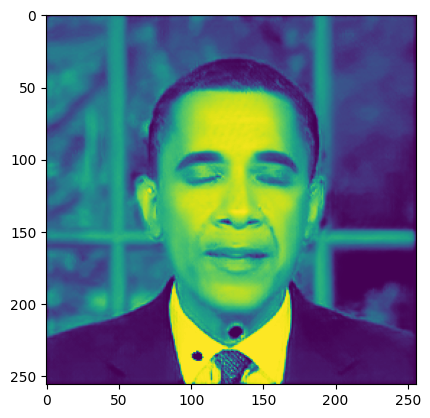

In [52]:
print(prediction.shape)
plt.imshow(prediction[0,0])

(1, 11, 3, 64, 64)


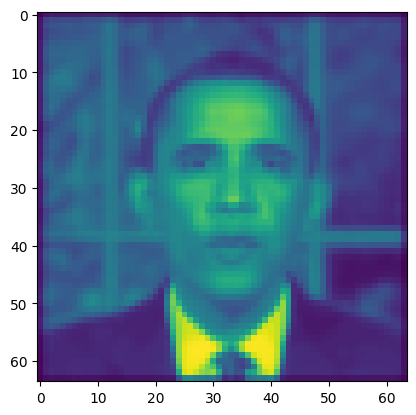

In [47]:
print(sparse_map.shape)
plt.imshow(sparse_map[0,0,0])

(1, 1, 64, 64)


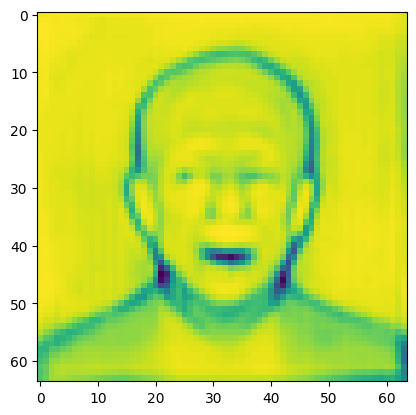

In [42]:
print(occ_map.shape)
plt.imshow(occ_map[0,0])

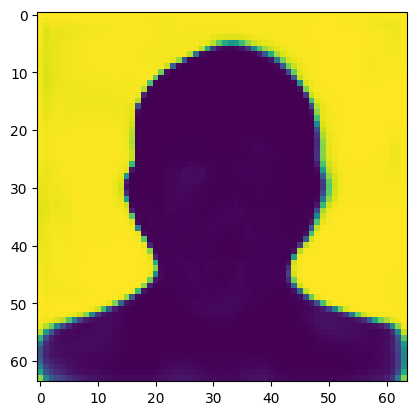

In [37]:
plt.imshow(mask[0,0])

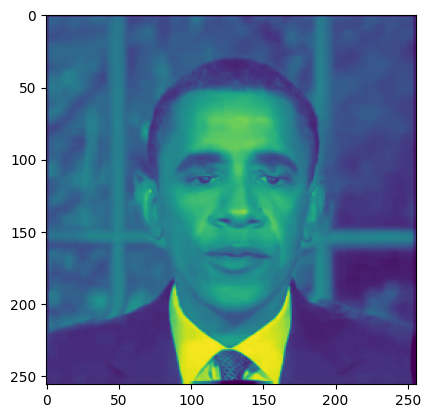

In [28]:
plt.imshow(a[0,0])

TypeError: Invalid shape (64, 64, 2) for image data

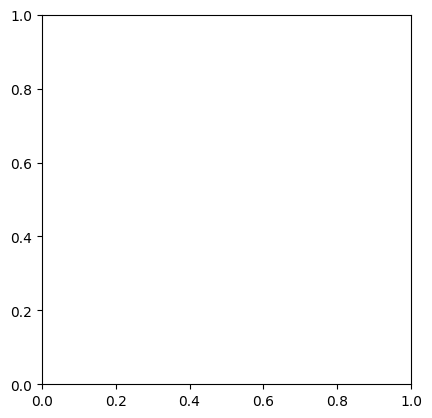

In [44]:
plt.imshow(b[0,:,:,])